In [1]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

In [164]:
# import modules
import src.models
reload(src.models)
from src.models import *

import src.data_methods
reload(src.data_methods)
from src.data_methods import *

In [ ]:
# get data frame with variables of interest
df_gesture = CSV2VoI('data/recordings/gesture_nongesture.csv')

In [37]:
# get the unique gestures in the df
print(df_gesture['gesture'].unique())
# get dictionaries for mapping from gestures to ids, and vice versa
g2idx = {'no_gesture': 0, 'so_so': 1}
idx2g = {i: g for g, i in g2idx.items()}

['no_gesture' 'so_so']


In [59]:
# extract X and y matrices
X0, y = df2X_y(df_gesture, g2idx)
print(X0.shape)
print(y.shape)
print(y[:20])

dropped 0 of 6371 rows with nans
(6371, 21)
(6371,)
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [61]:
# separate into examples 250 frames long each (around 10 seconds long)
n_frames = 250
X1 = split2examples(X0, n_frames)
y1 = split2examples(y, n_frames)
print(X1.shape)
print(y1.shape)

(25, 250, 21)
(25, 250)


In [146]:
# shuffle the examples and labels
synced_shuffle(X1, y1)

In [147]:
model = many2many(n_gestures=len(g2idx), n_features = X1.shape[-1], n_frames=X1.shape[1], rnn_units=32)

Model: "many2one"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 250, 21)]         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 250, 32)           6912      
_________________________________________________________________
dense_4 (Dense)              (None, 250, 2)            66        
Total params: 6,978
Trainable params: 6,978
Non-trainable params: 0
_________________________________________________________________


In [148]:
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X1[:-1], y1[:-1], epochs=65, batch_size = 32, validation_split=0.2)

Train on 19 samples, validate on 5 samples
Epoch 1/65
19/19 [==============================] - 3s 157ms/sample - loss: 0.8977 - accuracy: 0.2352 - val_loss: 0.8219 - val_accuracy: 0.2464
Epoch 2/65
19/19 [==============================] - 0s 6ms/sample - loss: 0.8702 - accuracy: 0.2518 - val_loss: 0.8052 - val_accuracy: 0.2520
Epoch 3/65
19/19 [==============================] - 0s 6ms/sample - loss: 0.8444 - accuracy: 0.2625 - val_loss: 0.7896 - val_accuracy: 0.2728
Epoch 4/65
19/19 [==============================] - 0s 7ms/sample - loss: 0.8202 - accuracy: 0.2764 - val_loss: 0.7752 - val_accuracy: 0.2960
Epoch 5/65
19/19 [==============================] - 0s 6ms/sample - loss: 0.7975 - accuracy: 0.3004 - val_loss: 0.7618 - val_accuracy: 0.3184
Epoch 6/65
19/19 [==============================] - 0s 6ms/sample - loss: 0.7763 - accuracy: 0.3274 - val_loss: 0.7493 - val_accuracy: 0.3576
Epoch 7/65
19/19 [==============================] - 0s 6ms/sample - loss: 0.7565 - accuracy: 0.3699 - v

19/19 [==============================] - 0s 6ms/sample - loss: 0.4121 - accuracy: 0.8347 - val_loss: 0.5415 - val_accuracy: 0.6624
Epoch 59/65
19/19 [==============================] - 0s 7ms/sample - loss: 0.4086 - accuracy: 0.8366 - val_loss: 0.5395 - val_accuracy: 0.6664
Epoch 60/65
19/19 [==============================] - 0s 6ms/sample - loss: 0.4051 - accuracy: 0.8379 - val_loss: 0.5375 - val_accuracy: 0.6672
Epoch 61/65
19/19 [==============================] - 0s 5ms/sample - loss: 0.4016 - accuracy: 0.8383 - val_loss: 0.5354 - val_accuracy: 0.6664
Epoch 62/65
19/19 [==============================] - 0s 6ms/sample - loss: 0.3981 - accuracy: 0.8394 - val_loss: 0.5334 - val_accuracy: 0.6680
Epoch 63/65
19/19 [==============================] - 0s 6ms/sample - loss: 0.3946 - accuracy: 0.8398 - val_loss: 0.5313 - val_accuracy: 0.6824
Epoch 64/65
19/19 [==============================] - 0s 6ms/sample - loss: 0.3911 - accuracy: 0.8413 - val_loss: 0.5290 - val_accuracy: 0.6824
Epoch 65/65

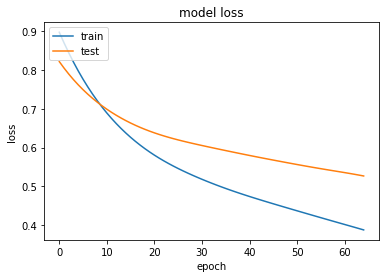

In [149]:
# plot history:
## summarize history for loss, from https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
plt_metric(history, 'loss')

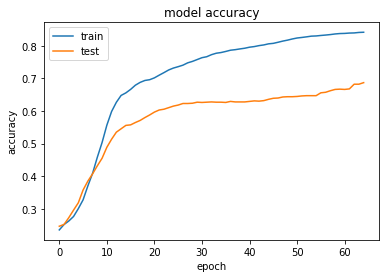

In [150]:
plt_metric(history, 'accuracy')

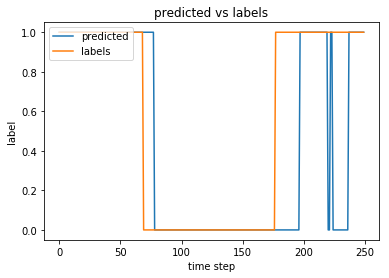

In [153]:
# plot predictions on the unseen example
pred = model.predict(np.array([X1[-1]]))
plt_pred(y1[-1], pred)

mean fps: 115.28
target fps: 25
skipping every 5 frames
Found left hand data:  False
Found right hand data:  True
dropped 0 of 659 rows with nans


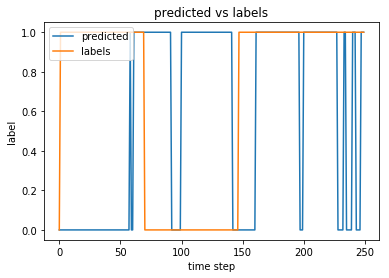

In [165]:
Xn, yn = CSV2examples('data/recordings/nick.csv')
pred = model.predict(np.array([Xn[1]]))
plt_pred(yn[1], pred)